<a href="https://colab.research.google.com/github/DipanshuKumar449/Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Appliance Energy Perdicition



##### **Project Type**    - Regression
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**Dipanshu Kumar

# **Problem Statement**


The data set is at 10min for about 4.5 months. The house temperature and humidity conditioned are monitored with a Zigbee Wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3min. Then the wireless data was averaged for 10 minutes. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station(Cheieves Airport Belgium) was downloaded from a public data set from Reliable Prognosis(rp5.ru) and merged together with the experimental data set using the date and time column. Two random variables have been included in the dataset for testing the regression models and to filter out non-predictive attributes. You need to predict the energy use of appliances.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor



### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Appliance Energy Prediction - Dipanshu Kumar/data_application_energy.csv')

### Dataset First View

In [ ]:
# Dataset First Look

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape
print(f'The total number of rows in the datset : {df.shape[0]}')
print(f'The total number of columns in the datset : {df.shape[1]}')

The total number of rows in the datset : 19735
The total number of columns in the datset : 29


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

There is no null values in the dataset.

### What did you know about your dataset?

The dataset from above understanding consists of 19735 rows and 29 columns with no duplicate and no null values. The features i.e the columns are selected based on the observation from ZigBee Wireless sensors and weather from an airport weather station apart from this we also have inculuded two random variables for testing and filtering out non_predictive attributes all these observations are combined together foe our further process.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Variables Description 


*   Date - present in  year-month-day hour:minute:second format
*   Appliances -  energy use in Wh
*   lights -  energy use of light fixtures in the house in Wh
*   T1 -  Temperature in kitchen area, in Celsius
*   T2 -  Temperature in living room area, in Celsius
*   T3 -  Temperature in laundry room area, in Celsius
*   T4 -  Temperature in office room, in Celsius
*   T5 -  Temperature in bathroom, in Celsius
*   T6 -  Temperature outside the building(north side), in Celsius
*   T7 -  Temperature in ironing room, in Celsius
*   T8 -  Temperature in teenager room 2, in Celsius
*   T9 -  Temperature in parents room, in Celsius
*   RH1 - Humidity in kitchen area, in %
*   RH2 - Humidity in living room area, in %
*   RH3 - Humidity in laundry room area, in %
*   RH4 - Humidity in office room, in %
*   RH5 - Humidity in in bathroom, in %
*   RH6 - Humidity outside the building(north side), in %
*   RH7 - Humidity in ironing room, in %
*   RH8 - Humidity in teenager room 2, in %
*   RH9 - Humidity in parents room, in %
*   To  - Temperature outside (from Chievres weather station), in Celsius
*   Pressure - (from Chievres weather station), in mm Hg
*   Hg RHout -  Humidity outside (from Chievres weather station), in %
*   Wind Speed - (from Chievres weather station), in m/s
*   Visibilty - (from Chievres weather station), in km
*   Tdewpoint - (from Chievres weather station), Â°C
*   rv1  -  nondimensional
*   rv2  -  nondimensional
*   Appliance,Energy Use in Wh is considered as Dependent variable.























### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64



### **Data Preprocessing**



In [ ]:
#Changing Datatype of the date column for better extraction

df['dates'] = pd.to_datetime(df['date'])

In [ ]:
#Getting the months and days from date

df['month'] = df['dates'].dt.month_name()
df['days'] = df['dates'].dt.day_name()
df['hour'] = df['dates'].dt.hour


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#creating separte columns for better understanding

light_col = ["lights"]

temp_col = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

humidity_col = ["RH_1","RH_2","RH_3","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

weather_col = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"]

date_col = ['month','days','hour']

random_col = ["rv1","rv2"]

taget_col = ["Appliances"]

#Defining Independent and Dependent variables

independent_var = df[ light_col + temp_col + humidity_col + weather_col + date_col + random_col]

dependent_var = df[taget_col]


In [ ]:
independent_var

,lights,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,month,days,hour,rv1,rv2
0,30,19.890000,19.200000,19.790000,19.000000,17.166667,7.026667,17.200000,18.2000,17.033333,...,5.300000,92.000000,733.5,7.000000,63.000000,January,Monday,17,13.275433,13.275433
1,30,19.890000,19.200000,19.790000,19.000000,17.166667,6.833333,17.200000,18.2000,17.066667,...,5.200000,92.000000,733.6,6.666667,59.166667,January,Monday,17,18.606195,18.606195
2,30,19.890000,19.200000,19.790000,18.926667,17.166667,6.560000,17.200000,18.2000,17.000000,...,5.100000,92.000000,733.7,6.333333,55.333333,January,Monday,17,28.642668,28.642668
3,40,19.890000,19.200000,19.790000,18.890000,17.166667,6.433333,17.133333,18.1000,17.000000,...,5.000000,92.000000,733.8,6.000000,51.500000,January,Monday,17,45.410389,45.410389
4,40,19.890000,19.200000,19.790000,18.890000,17.200000,6.366667,17.200000,18.1000,17.000000,...,4.900000,92.000000,733.9,5.666667,47.666667,January,Monday,17,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0,25.566667,25.890000,27.200000,24.700000,23.200000,24.796667,24.500000,24.7000,23.200000,...,13.333333,55.666667,755.2,3.333333,23.666667,May,Friday,17,43.096812,43.096812
19731,0,25.500000,25.754000,27.133333,24.700000,23.230000,24.196667,24.557143,24.7000,23.200000,...,13.300000,56.000000,755.2,3.500000,24.500000,May,Friday,17,49.282940,49.282940
19732,10,25.500000,25.628571,27.050000,24.700000,23.230000,23.626667,24.540000,24.7000,23.200000,...,13.266667,56.333333,755.2,3.666667,25.333333,May,Friday,17,29.199117,29.199117
19733,10,25.500000,25.414000,26.890000,24.700000,23.200000,22.433333,24.500000,24.6625,23.200000,...,13.233333,56.666667,755.2,3.833333,26.166667,May,Friday,17,6.322784,6.322784


In [ ]:
dependent_var

,Appliances
0,60
1,60
2,50
3,50
4,60
...,...
19730,100
19731,90
19732,270
19733,420


In [ ]:
independent_var.describe()

,lights,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,hour,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,3.801875,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,...,41.552401,7.411665,3.760707,79.750418,755.522602,4.039752,38.330834,11.502002,24.988033,24.988033
std,7.935988,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,...,4.151497,5.317409,4.194648,14.901088,7.399441,2.451221,11.794719,6.921953,14.496634,14.496634
min,0.000000,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,...,29.166667,-5.000000,-6.600000,24.000000,729.300000,0.000000,1.000000,0.000000,0.005322,0.005322
25%,0.000000,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,...,38.500000,3.666667,0.900000,70.333333,750.933333,2.000000,29.000000,6.000000,12.497889,12.497889
50%,0.000000,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,...,40.900000,6.916667,3.433333,83.666667,756.100000,3.666667,40.000000,12.000000,24.897653,24.897653
75%,0.000000,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,...,44.338095,10.408333,6.566667,91.666667,760.933333,5.500000,40.000000,17.000000,37.583769,37.583769
max,70.000000,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,...,53.326667,26.100000,15.500000,100.000000,772.300000,14.000000,66.000000,23.000000,49.996530,49.996530


In [ ]:
dependent_var.describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


### What all manipulations have you done and insights you found?

As per the reqirement, firstly we have created the separate columns for better management then used the columns to create dependent and independent variables.



Also, when we move forward we will decide which feature i.e columns to be kept and which is to be removed based on various testing procedures by understanding their importance.

Important Insights:

*   Temperature columns - Temperature inside the house varies between 14.89 Degree celcius & 29.85 Degree celcius, with slight variation in (T6) which varies between -6.06 Degree celcius to 28.29 Degree celcius. The reason for this variation in T6 is that the sensor may be kept outside the house also the T_out(present in wheather segment) i.e outside temprature varies between -5 Degree celcius to 26.1 Degree celcius.

* Humidiy columns - Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 which varies between 29.82% to 96.32% and 1% to 99.9% respectively.The RH_out(present in wheather segment) i.e outside Humidity varies between 24% to 100%.  

* Appliances - 75% of Appliances consumes less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this columns which requires treatments to reduce computational errors.  

* There is no categorival column in the dataset provided
* There is no null value in the datset.


















## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

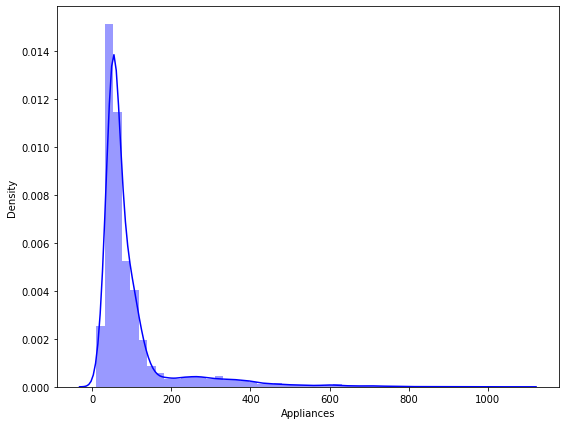

In [ ]:
# Chart - 1 visualization code
# Dependent variable 'Appliances'
plt.figure(figsize=(9,7))
sns.distplot(df['Appliances'],color="b")
plt.show()

##### 1. Why did you pick the specific chart?

Reason behind choosing  distplot, as it give a brief insight about the skewness, from which we can make decision regarding transformation to be done or not.

##### 2. What is/are the insight(s) found from the chart?



Important Insights:


From the result we can see that for dependent variable there is a postive skewness.So, we will make the use of log transformation to get the normal distribution.


Also most the values are around mean 100 Wh . There are outliers in this column.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

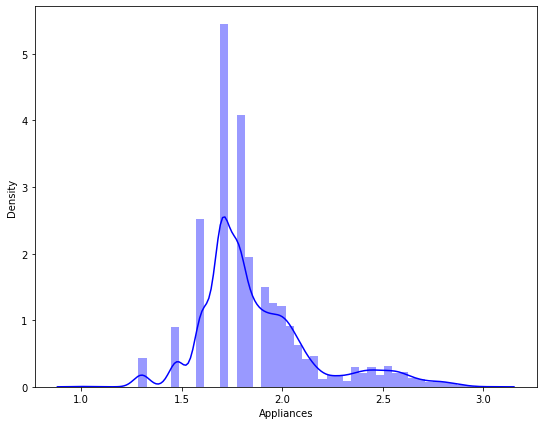

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(9,7))
sns.distplot(np.log10(df['Appliances']),color="b")
plt.show()

##### 1. Why did you pick the specific chart?

Once again to gain the best idea about the distribution we have made the use of this chart.

##### 2. What is/are the insight(s) found from the chart?

It has given a brief instrustion that after the application of log transformation we seen a normal distribution.

> We are following this step due to these specific reasons.

*   It has one of the important properties called central theorem. Central theorem means relationship between shape of population distribution and shape of sampling distribution of mean. This means that sampling distribution of mean approaches normal as sample size increase.
*   In case the sample size is large the normal distribution serves as good approximation.
*   Due to its mathematical properties it is more popular and easy to calculate.
*   It is used in statistical quality control in setting up of control limits.
*   The whole theory of sample tests t, f and chi-square test is based on the normal distribution.









##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Understanding the usage of Energy every month

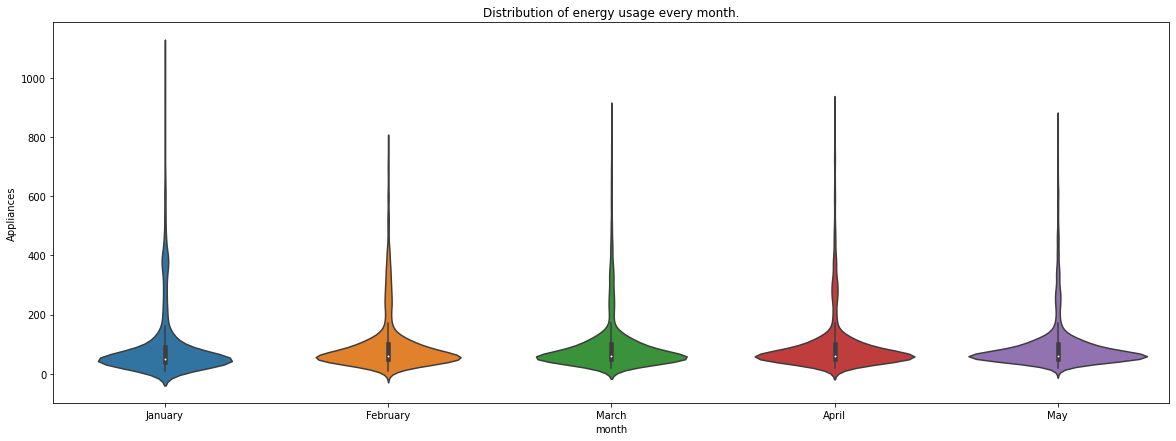

In [ ]:
# Violin Plot distribution.
plt.figure(figsize=(20,7))

sns.violinplot(y='Appliances',data = df,x='month')
plt.title('Distribution of energy usage every month.')
plt.show()

Insights :

*   In the month of january the energy useage is high comparing to the other months
*   February has low energy consumption.



### Understanding the usage of energy everyday.

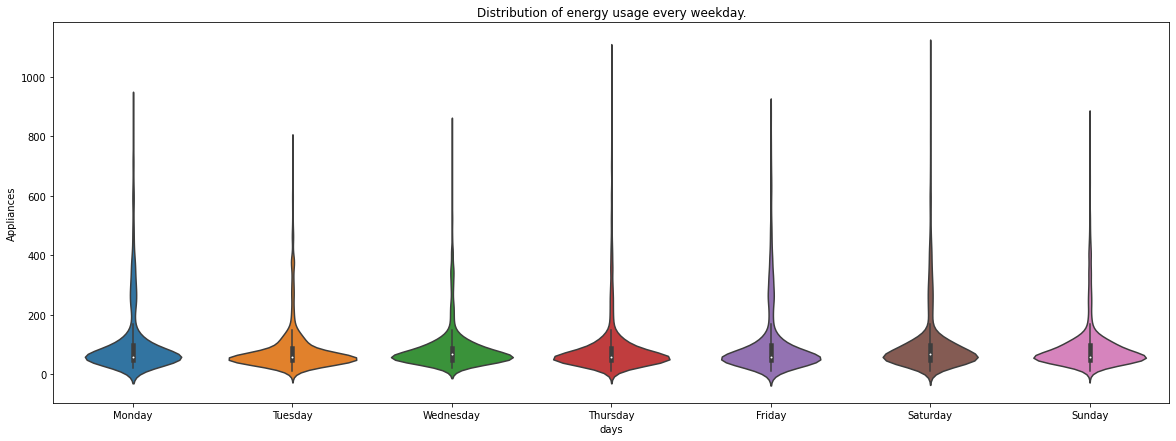

In [ ]:
# Violin Plot distribution.

plt.figure(figsize=(20,7))

sns.violinplot(y='Appliances',data = df,x='days')
plt.title('Distribution of energy usage every weekday.')
plt.show()

Insight :

*   The general trend shows that the Every Weekday the energy consumption is in between 1000 to 800 Wh



### Understanding hourly Energy consumption

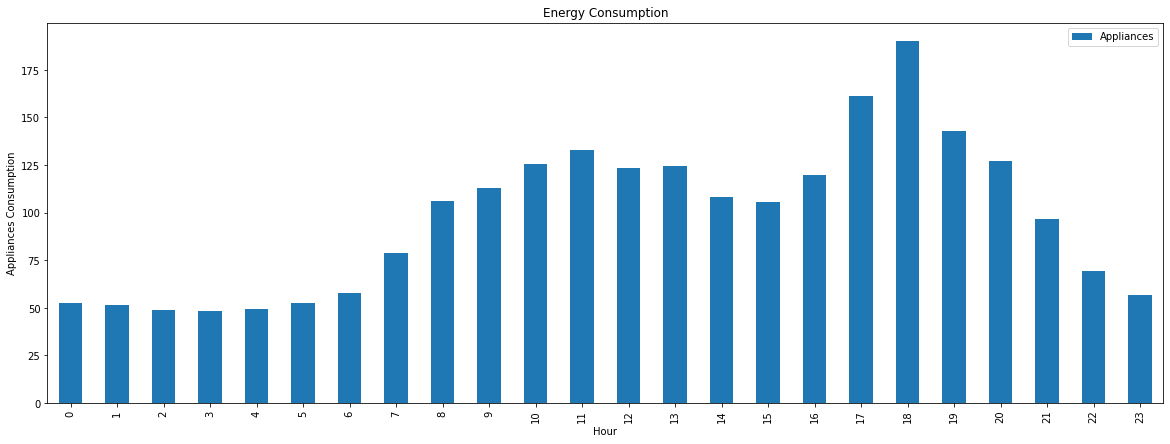

In [ ]:
#Bar plot distribution

hour_con = df.groupby('hour').agg({'Appliances' : 'mean'})
hour_con.plot(kind='bar', title='Energy Consumption', ylabel='Appliances Consumption',
         xlabel='Hour', figsize=(20, 7))
plt.show()

#### Chart - 3

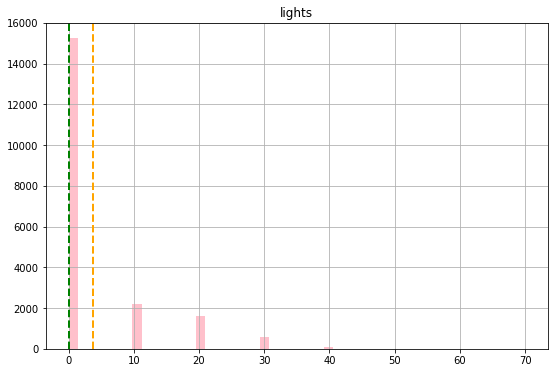

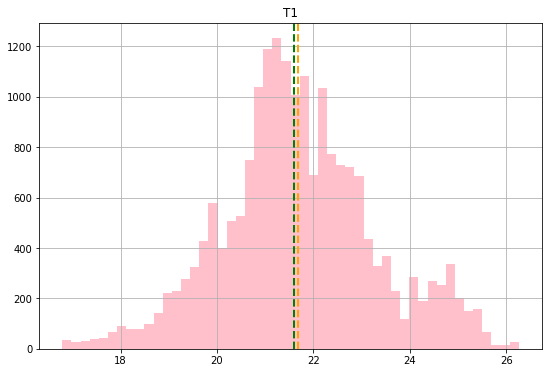

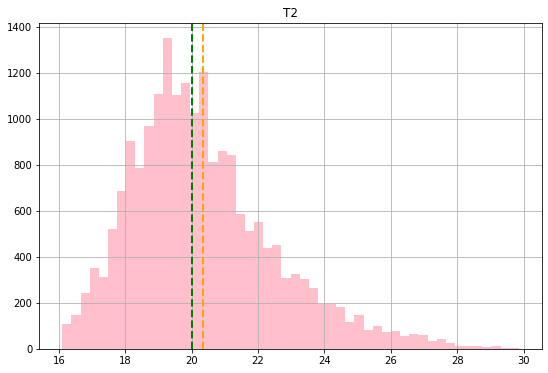

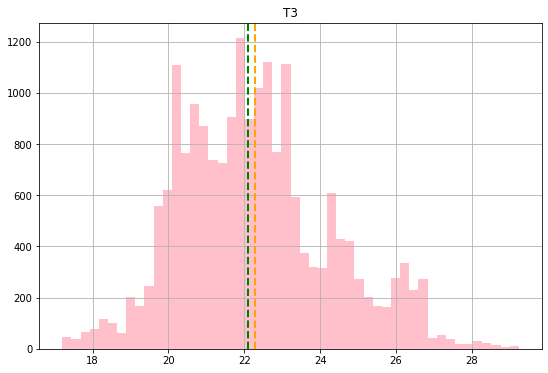

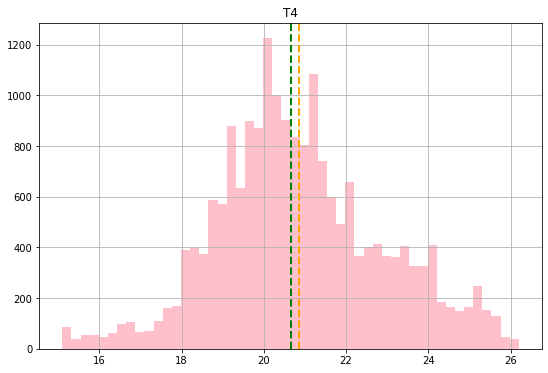

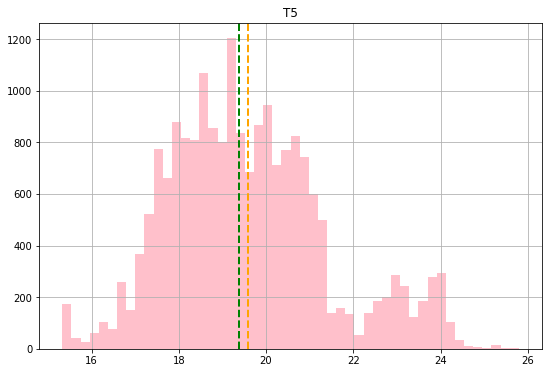

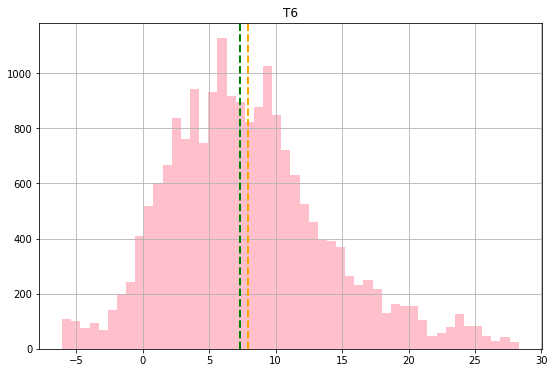

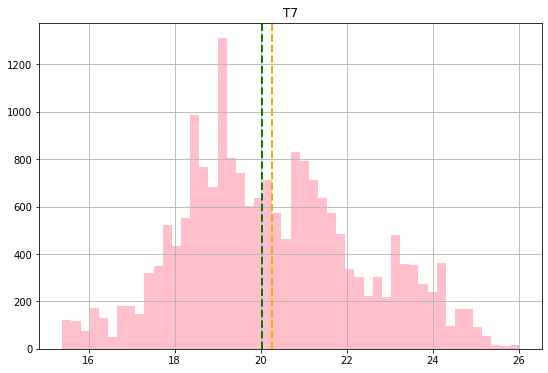

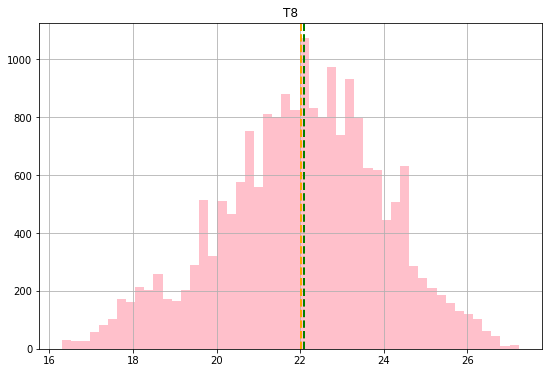

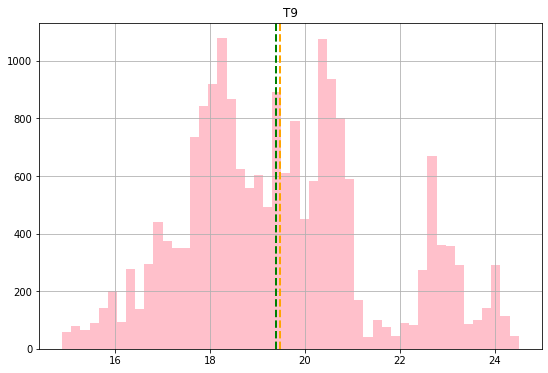

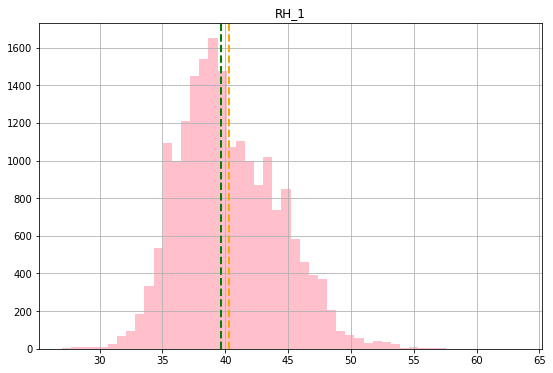

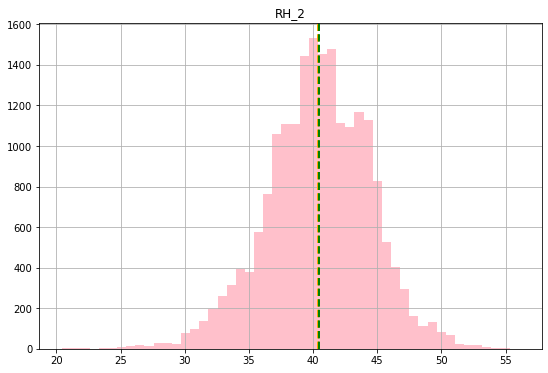

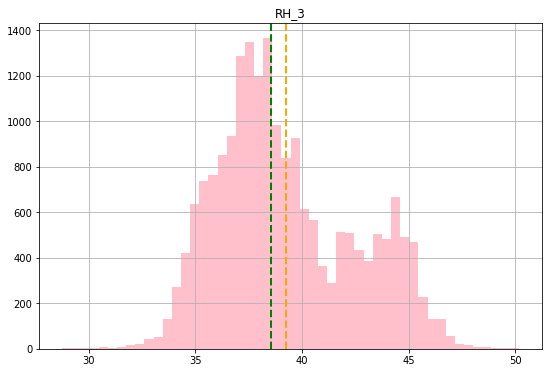

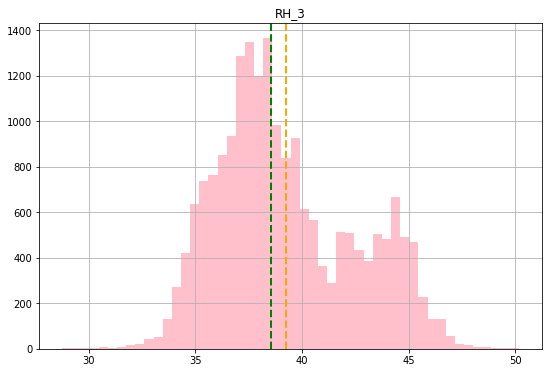

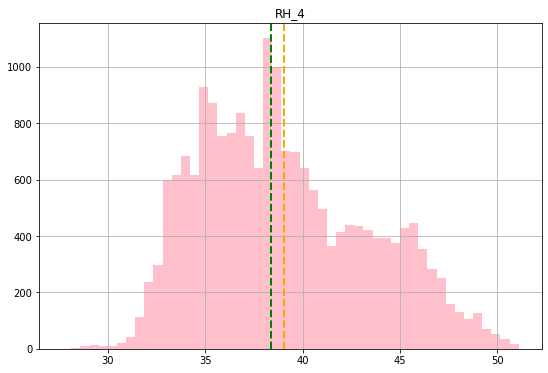

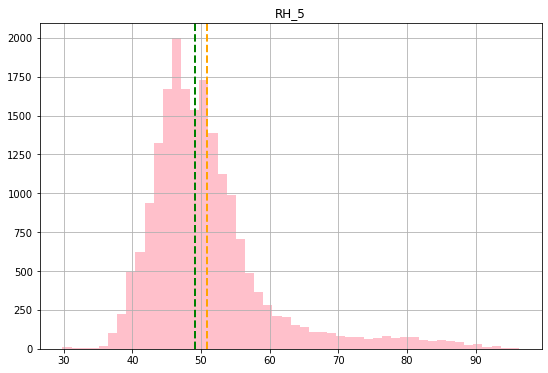

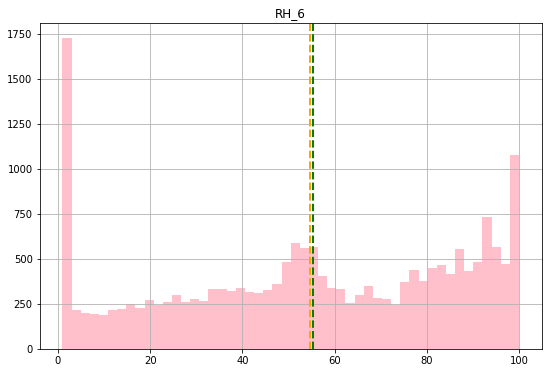

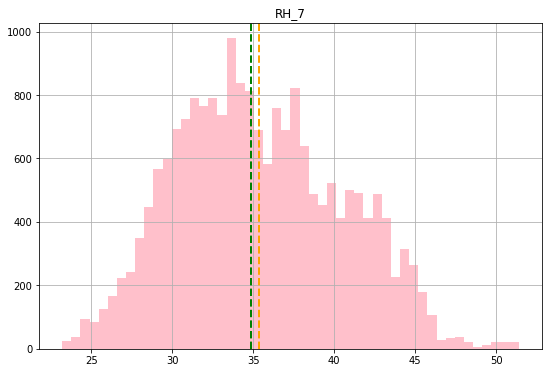

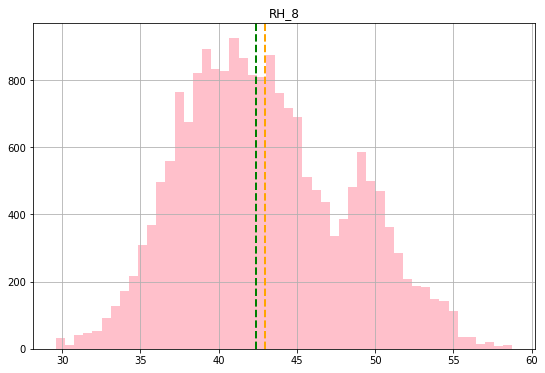

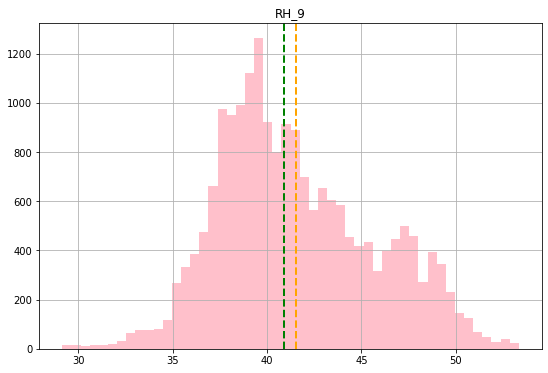

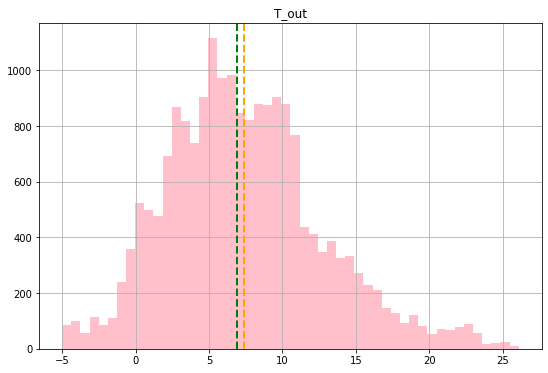

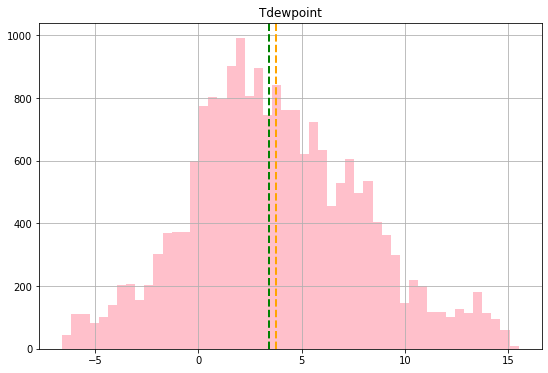

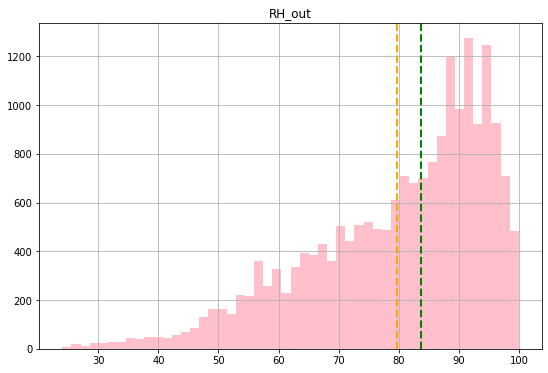

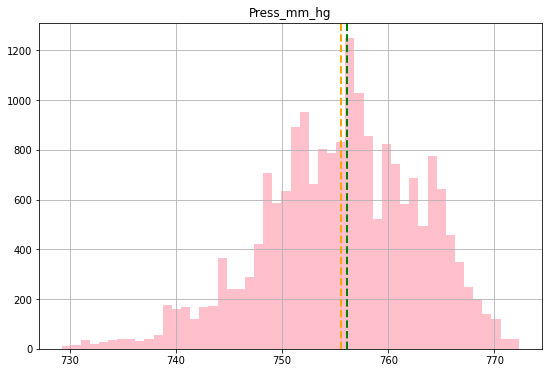

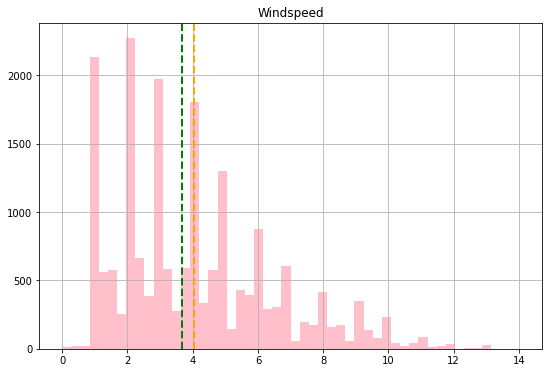

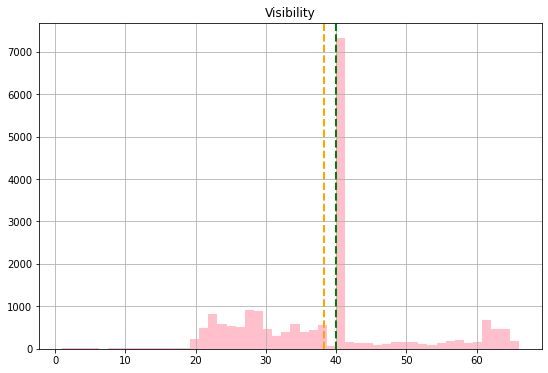

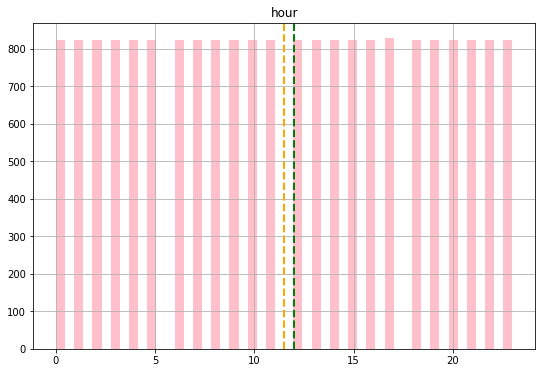

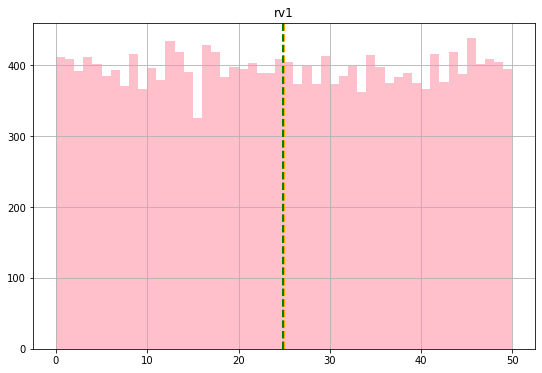

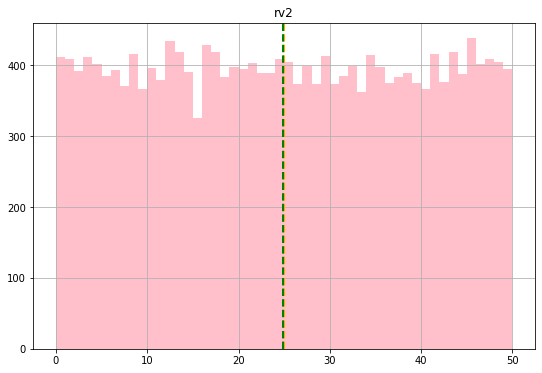

In [ ]:
# Chart - 3 visualization code
# Creating bar plots for each features i.e considering only numerical columns

independent_var_columns = independent_var.describe().columns


for col in independent_var_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax ,color ='pink')
    ax.axvline(feature.mean(), color='orange', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

The basic reason of using Histogram is that it is one of the most popular and 
commonly used devices for charting continuous frequency distribution. A single glance at a histogram gives us some idea about the shape and spread of the data.

One of the main advantages of a histogram are its simplicity and versatility. It can be used in many different situations to offer an insightful look at frequency distribution.



##### 2. What is/are the insight(s) found from the chart?

From the above charts one thing is clear that most of the features are normally distributed which is good for us. But it doesn't mean that we'll make the use of all the features we will deal with this statement in feature engineering.


Important Insights:

* Temperature - All the columns follow normal distribution except T9. 
* Humidity - All columns follow normal distribution except RH_6 and RH_out. 
* Visibilty - This column is negatively skewed. 
* Windspeed - This column is postively skewed.
* Light - This column is neither following normal distribution nor it follows and relevent skewness.Also, this column is not adding any values to the dataset thatmuch so, in the upcoming process we will drop this column
















In [ ]:
#Checking the description of light column as it shows some unusual behaviors

df.lights.describe()

count    19735.000000
mean         3.801875
std          7.935988
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: lights, dtype: float64

Light column describes that 75% or even more data is 0.00. So, it is to be dropped later.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

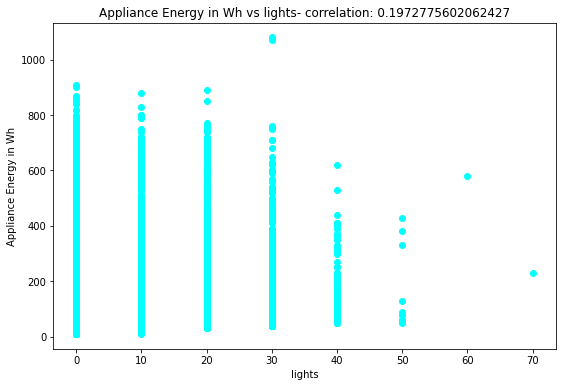

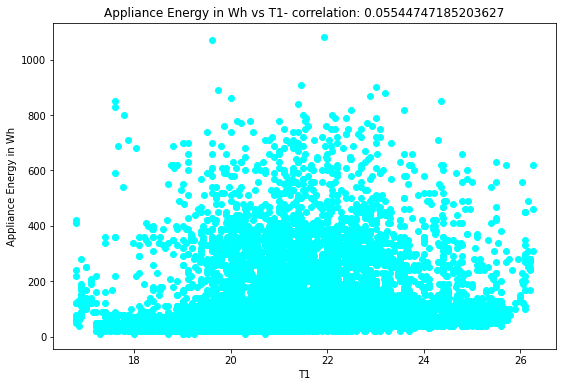

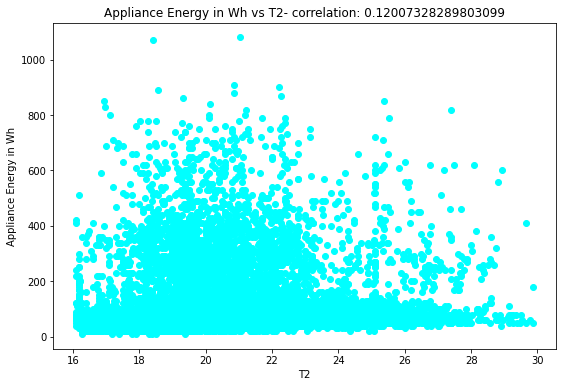

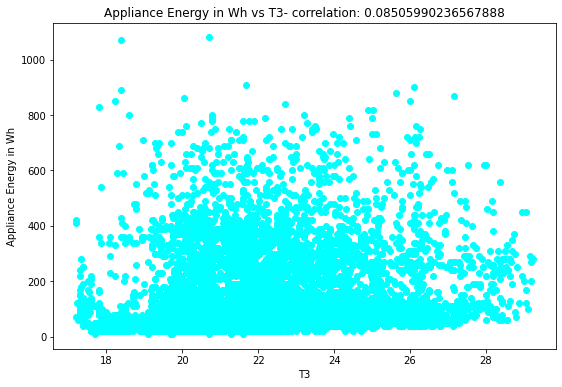

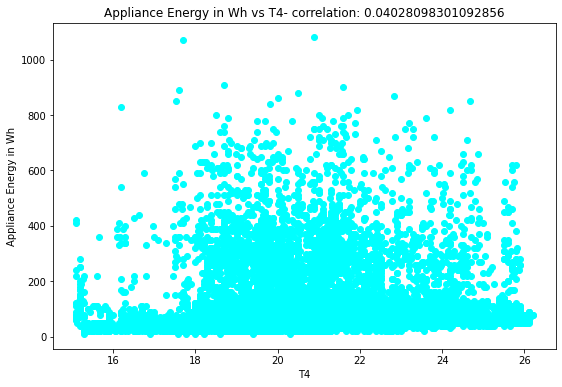

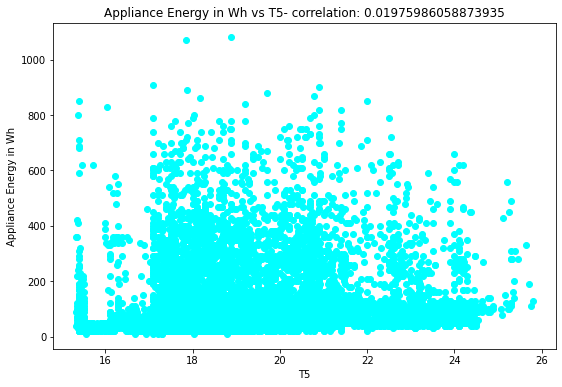

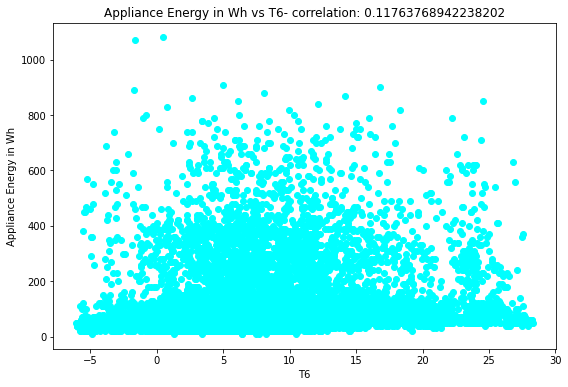

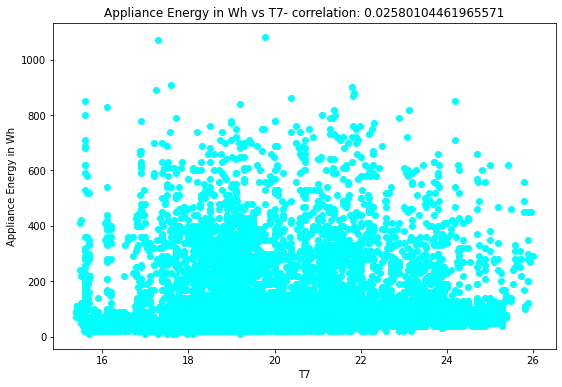

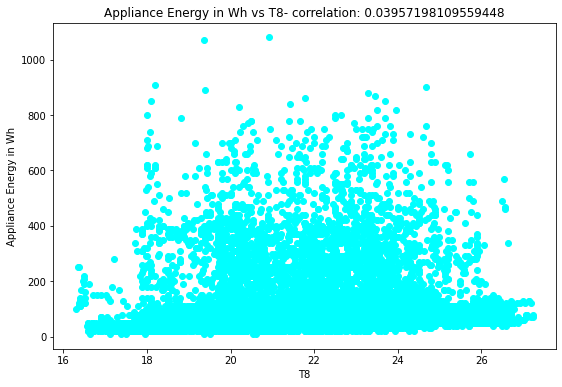

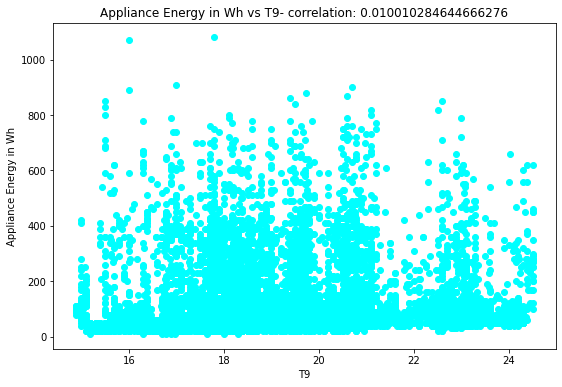

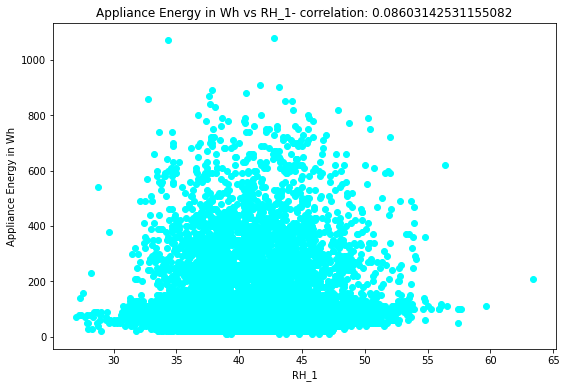

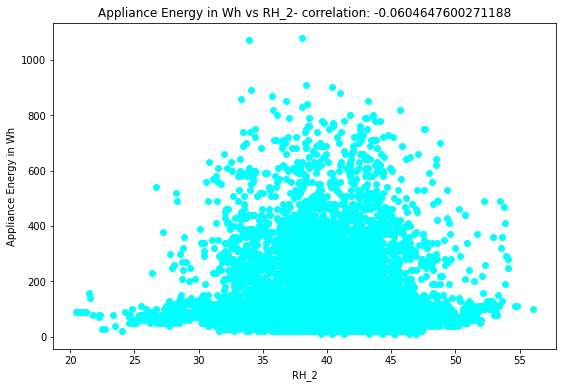

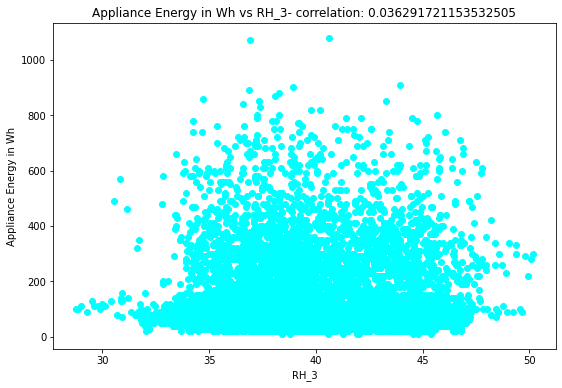

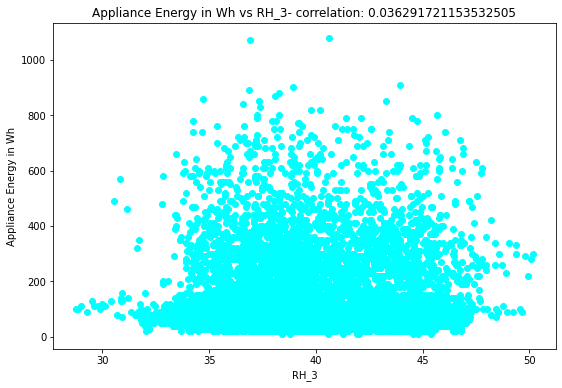

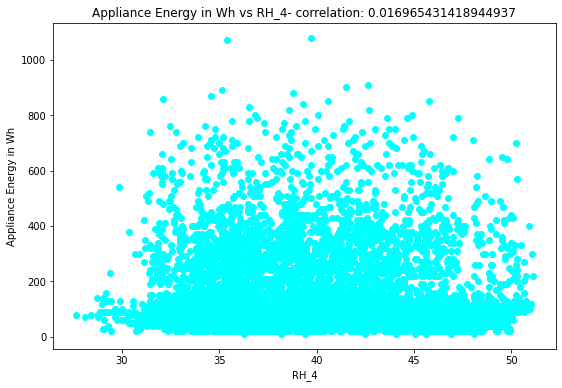

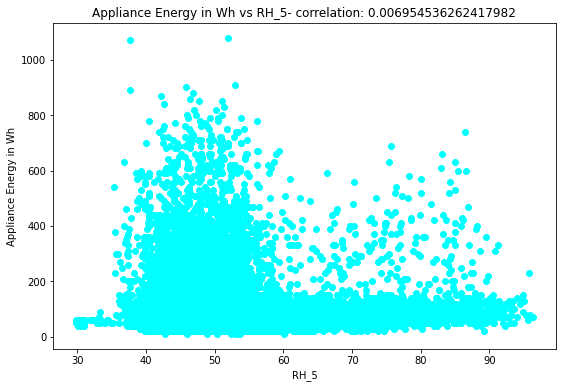

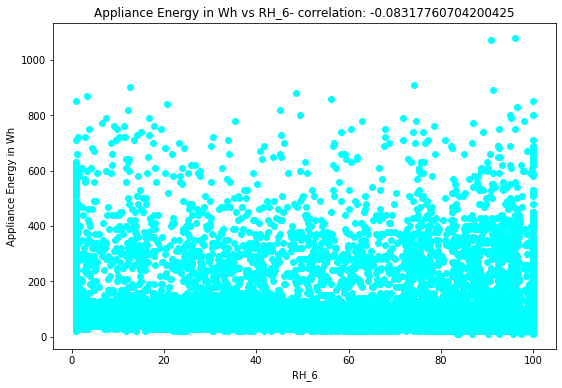

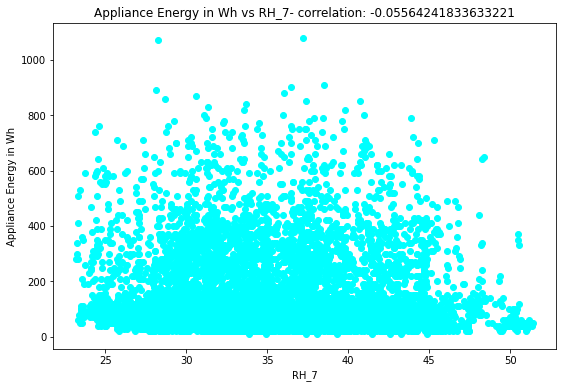

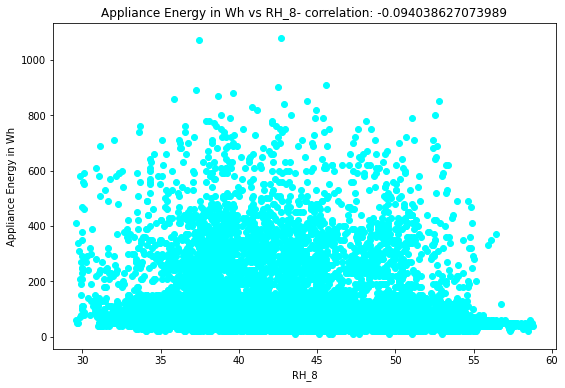

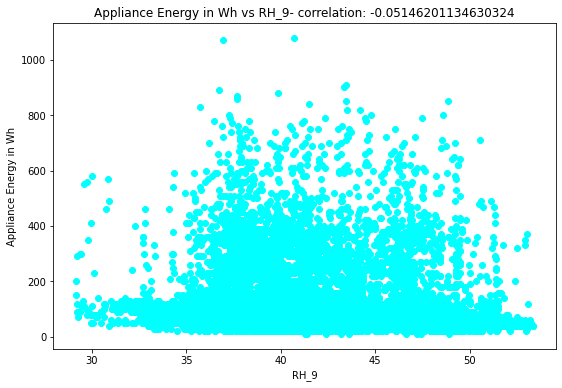

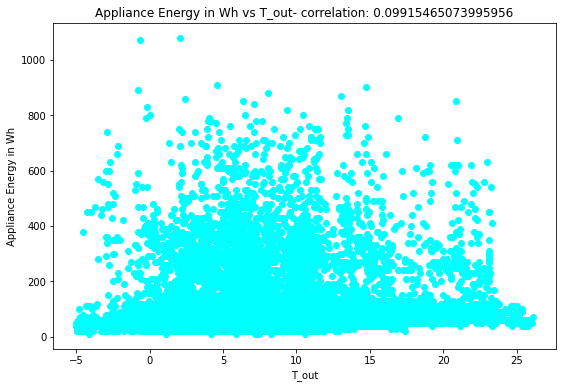

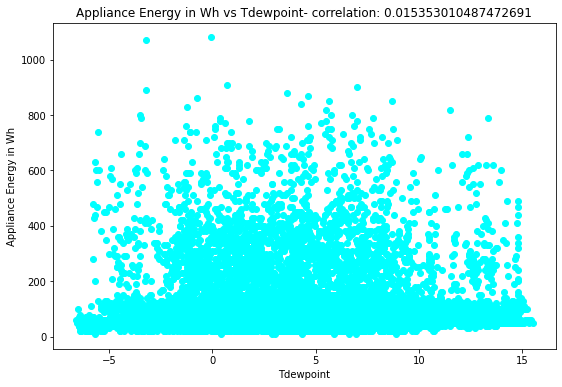

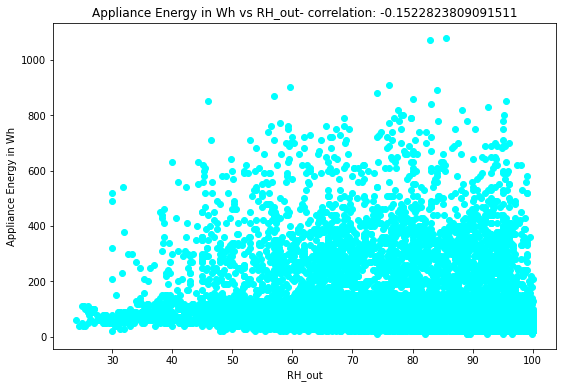

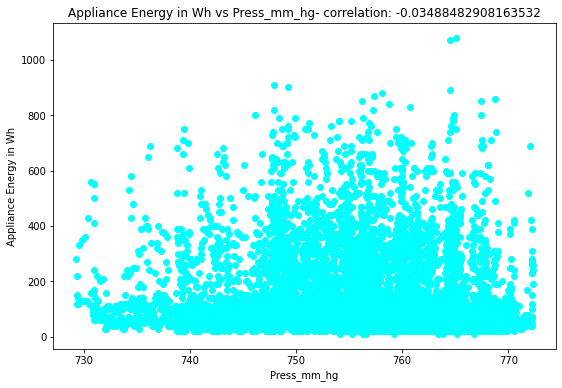

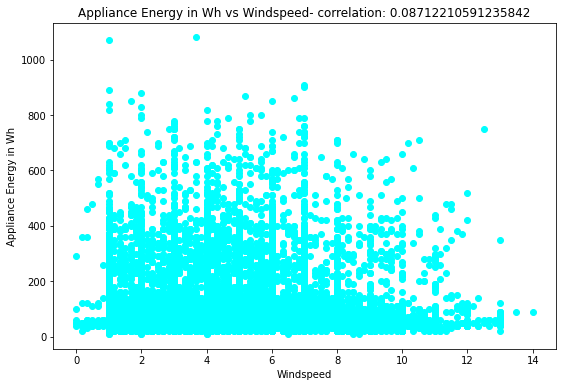

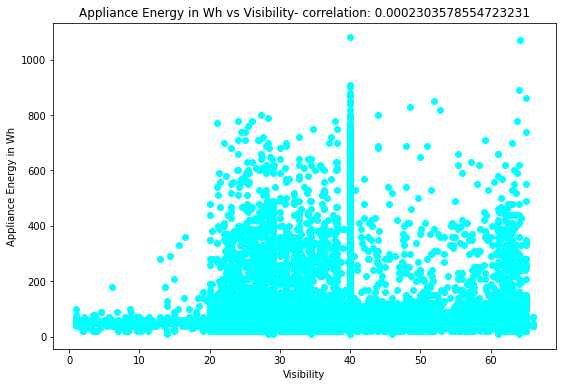

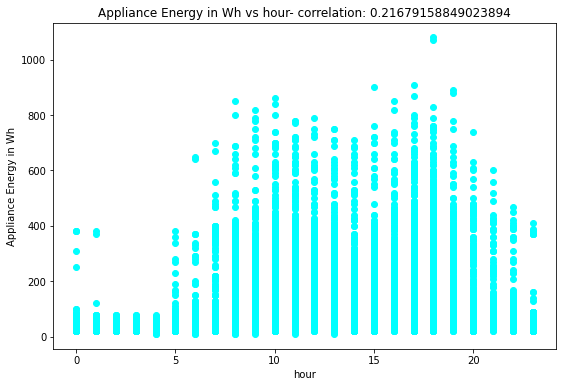

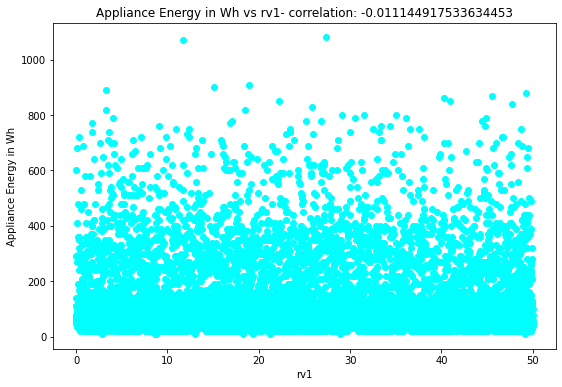

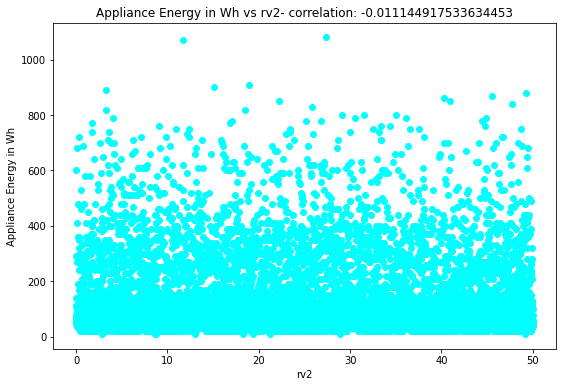

In [ ]:
# Chart - 4 visualization code
# Using Scatter plot and finding the correlation between the dependent and independent features 


for obs in independent_var_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    input = df[obs]
    output = df['Appliances']
    correlation = input.corr(output)
    plt.scatter(x=input, y=output, color='cyan')
    plt.xlabel(obs)
    plt.ylabel('Appliance Energy in Wh')
    ax.set_title('Appliance Energy in Wh vs ' + obs + '- correlation: ' + str(correlation))

plt.show()


##### 1. Why did you pick the specific chart?

Scatter plots are simple and non-mathematical method of studying the correlation between the two variables.

It can be easily understood and interpreted. It enables us to know the presence or absence of correlation at a single glance of the diagram

It is not influenced by the size of extreme values, whereas most of the mathematical methods lack this quality.

It is a step in investigating the relationship between two variables.







##### 2. What is/are the insight(s) found from the chart?

Here finding the correlation between features and labels is an important step while creating a machine learning alogrithms(linear regression in this case).Here from these graphs we went to find the relationship between the dependent variable('Appliance') and all the independent variables because one assumption that linear regression consist is that there should be a linear relationship between features and label. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

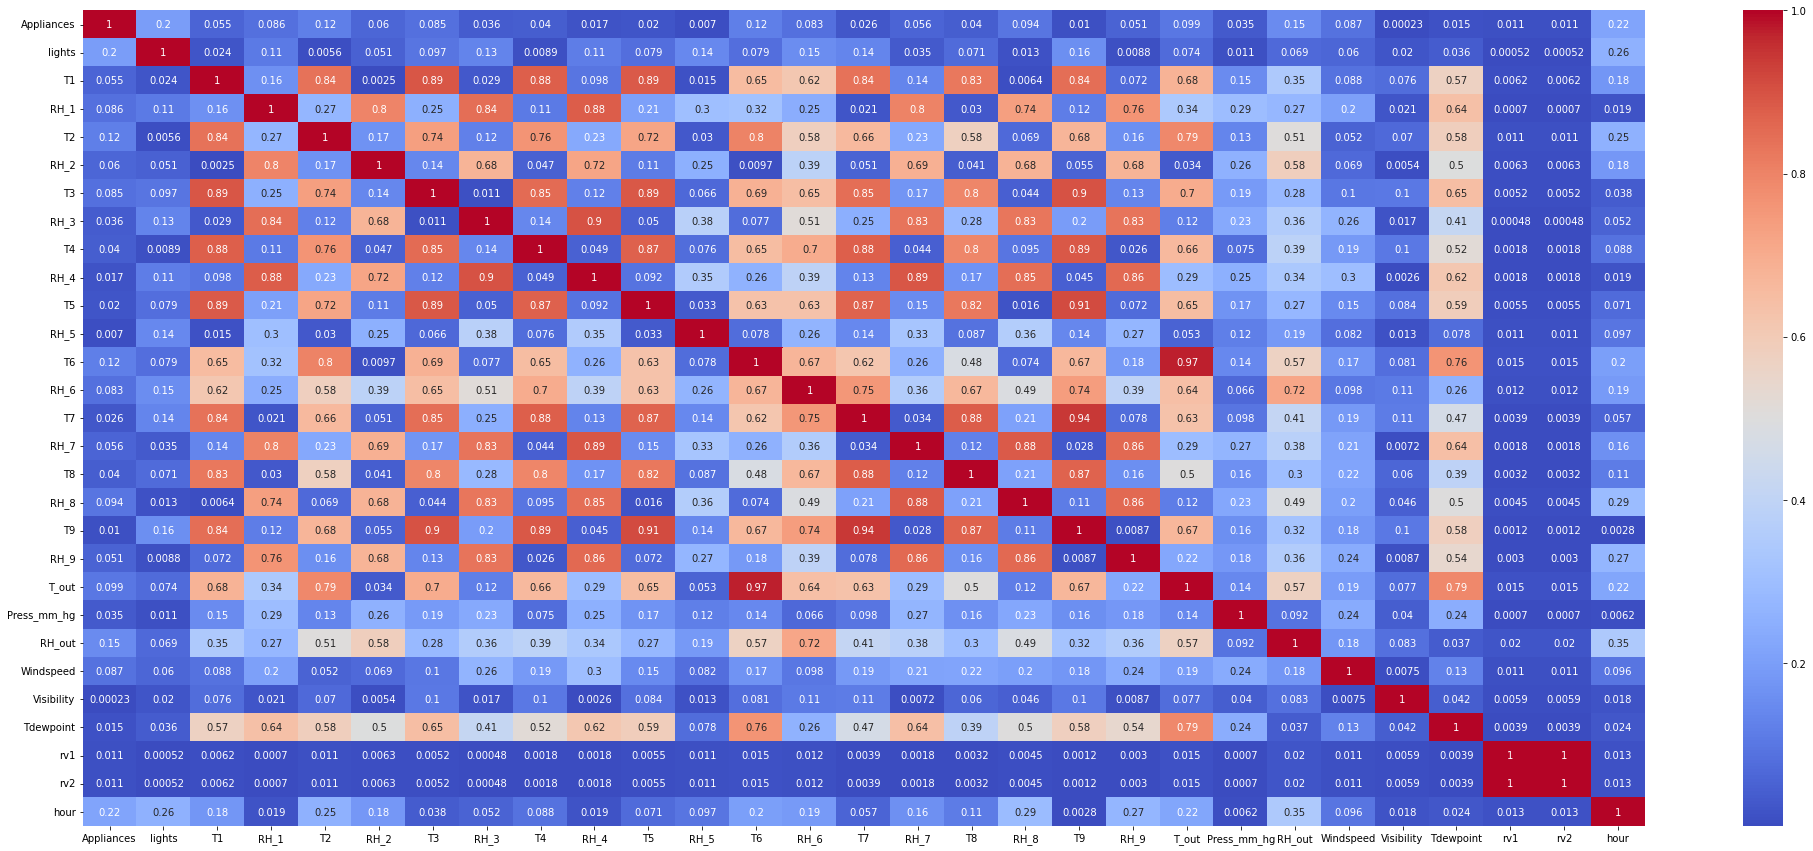

In [ ]:
# Correlation Heatmap visualization code


plt.figure(figsize=(35,15))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

The main reasons for using the heat map are:


*   Heatmaps give an instant overview of key web performance parameters.
*   Heatmaps provide a visual approach to understanding numeric values.

*   Heatmaps help companies make informed choices that improve the bottom line.
*   It also helps in understanding the multicollinearity based on to which we can decide which feature to be kept and which is to be removed or combined.





##### 2. What is/are the insight(s) found from the chart?


* Temprature columns : It is clear from the heatmap that four columns have a high degree of correlation with T9 that are T3,T5,T7,T8 also T6 & T_Out has high correlation. Hence T6 & T9 is to be removed from training set as information provided by them can be provided by other features.  
* Humidity columns : For each and every humidity columns i.e RH_1 to RH_9 we see moderate correlation which is workable.  
* Weather_columns: Visibility, Tdewpoint, Press_mm_hg have low correlation values
* Random variables column : Similar to the trend that we have seen in the weather columns we have low correlations





## Outliers Treatment:

We are not considering the light column(as it contains mostly null values as seen above), date column as already converted to months, days and hours also considering only numerical columns

In [ ]:
df.drop(["lights","date","month","days","dates"], axis = 1 , inplace = True)

In [ ]:
#checking the outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1

((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).sum()

Appliances     2138
T1              515
RH_1            146
T2              546
RH_2            235
T3              217
RH_3             15
T4              186
RH_4              0
T5              179
RH_5           1330
T6              515
RH_6              0
T7                2
RH_7             42
T8               71
RH_8             17
T9                0
RH_9             21
T_out           436
Press_mm_hg     219
RH_out          239
Windspeed       214
Visibility     2522
Tdewpoint        10
rv1               0
rv2               0
hour              0
dtype: int64

In [ ]:
#Replacing outliers 
for i  in df.columns:
  if(i!=('Appliances')):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1

    df=df[(df[i]<(q3 + 1.5 * IQR))]
    df=df[(df[i]>(q1 - 1.5 * IQR))] 

In [ ]:
#checking the outliers again
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1

((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).sum()

Appliances     1451
T1               91
RH_1             34
T2               85
RH_2             22
T3               32
RH_3             51
T4               32
RH_4             37
T5               29
RH_5            202
T6                0
RH_6              0
T7                0
RH_7              7
T8                0
RH_8             11
T9                0
RH_9              0
T_out            11
Press_mm_hg      13
RH_out            0
Windspeed         0
Visibility        0
Tdewpoint         0
rv1               0
rv2               0
hour              0
dtype: int64

## ***6. Feature Engineering & Data Pre-processing***

**Handling Multicollinearity.**

From the above heatmap conclusions, one thing is clear that we are not including T6 and T9. So,dropping both the columns.

In [ ]:
df.drop(columns=['T6','T9'],axis =1,inplace=True)

Using VIF to cross check multicollinearity for all the remaining columns to get the best features selected

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.columns if i not in ["Appliances"]]])

,variables,VIF
0,T1,3658.349979
1,RH_1,2043.221732
2,T2,2470.297365
3,RH_2,2284.793736
4,T3,1235.075790
5,RH_3,1826.203209
6,T4,900.858726
7,RH_4,1379.186764
8,T5,1197.857992
9,RH_5,125.489137


Since we can observe that rv1 and rv2 is showing infinite correlation so we'll try it once again by creating another column rv_mean and dropping the other two columns.

In [ ]:
# Creating mean random variable column

df['rv_mean'] = df[['rv1','rv2']].mean(axis=1)


In [ ]:
calc_vif(df[[i for i in df.columns if i not in ["Appliances","lights","rv1","rv2"]]])

,variables,VIF
0,T1,3658.349979
1,RH_1,2043.221732
2,T2,2470.297365
3,RH_2,2284.793736
4,T3,1235.075790
5,RH_3,1826.203209
6,T4,900.858726
7,RH_4,1379.186764
8,T5,1197.857992
9,RH_5,125.489137


Here we can see that every temprature_columns,pressure column,RH_out column are showing high correlation but intuitively each features is having its own importance so we will create a model considering all these features now.

## ***7. ML Model Implementation***

## **Train Test split**

In [ ]:
#Creating Independent and dependent features based on the above procedures.

X = df[['T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint','hour','rv_mean']]


Y = df[['Appliances']]

In [ ]:
#Implementing Train and Test

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state =0)

print(x_train.shape)

(10936, 24)


In [ ]:
print(x_test.shape)

(2734, 24)


In [ ]:
print(y_train.shape)

(10936, 1)


In [ ]:
print(y_test.shape)

(2734, 1)


Since the datset contains high varying values of different features.There is a high possibility that the impact of one feature on label will be high when comparing to the impact of the other features(on the label) so it is necessary to scale them using standard scaler technique. The reason for using StandardScaler as it removes the mean and scales the data to unit variance. The scaling shrinks the range of the feature values.

In [ ]:
#importing standard scaler

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)


## **Implementing Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
lin_reg.score(x_train,y_train)

0.15339988898872203

In [ ]:
lin_reg.coef_

array([[ 6.64009616e-02,  6.06361821e-01, -4.08430884e-01,
        -6.07646108e-01,  4.14196329e-01,  1.76396274e-01,
         4.99950539e-02,  1.16117738e-01, -1.70891285e-01,
        -5.60963626e-02,  3.00241451e-02, -1.44690404e-01,
        -1.14913493e-02,  1.44806305e-01, -2.75618547e-01,
        -4.52948687e-02,  9.27378709e-02, -3.03472892e-04,
         6.06238515e-02,  6.34756629e-02,  8.82541503e-03,
        -8.77742569e-02,  7.85237282e-02,  9.55617601e-03]])

In [ ]:
lin_reg.intercept_

array([9.57249879e-16])

In [ ]:
train_y_pred = lin_reg.predict(x_train)
train_y_pred

array([[-0.23656385],
       [-0.13075489],
       [-0.31652642],
       ...,
       [ 0.8408677 ],
       [ 0.8113107 ],
       [ 0.12062261]])

In [ ]:
test_y_pred = lin_reg.predict(x_test)
test_y_pred

array([[ 0.05909374],
       [-0.22062786],
       [ 0.74888081],
       ...,
       [ 0.14355675],
       [ 0.41340389],
       [ 0.28786024]])

Considering the implementation of model a number of matrices are available to evaluate the model computationally.So using some matrices here to make decsion whether to use other models or not.

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

#Checking for traning dataset

MSE = mean_squared_error((y_train),(train_y_pred))
print("MSE : ",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

r2 = r2_score((y_train),(train_y_pred))
print("r2 score : ",r2)

print("Adjusted R2 : ",1-(1-r2_score((y_train),(train_y_pred)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))


MSE :  0.846600111011278
RMSE : 0.920108749556963
r2 score :  0.15339988898872203
Adjusted R2 :  0.1515376946285103


In [ ]:
#Checking for testing dataset

MSE = mean_squared_error((y_test),(test_y_pred))
print("MSE : ",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

r2 = r2_score((y_test),(test_y_pred))
print("r2 score : ",r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test),(test_y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE :  0.8593806408857183
RMSE : 0.9270278533494656
r2 score :  0.1406193591142817
Adjusted R2 :  0.13300579861917017


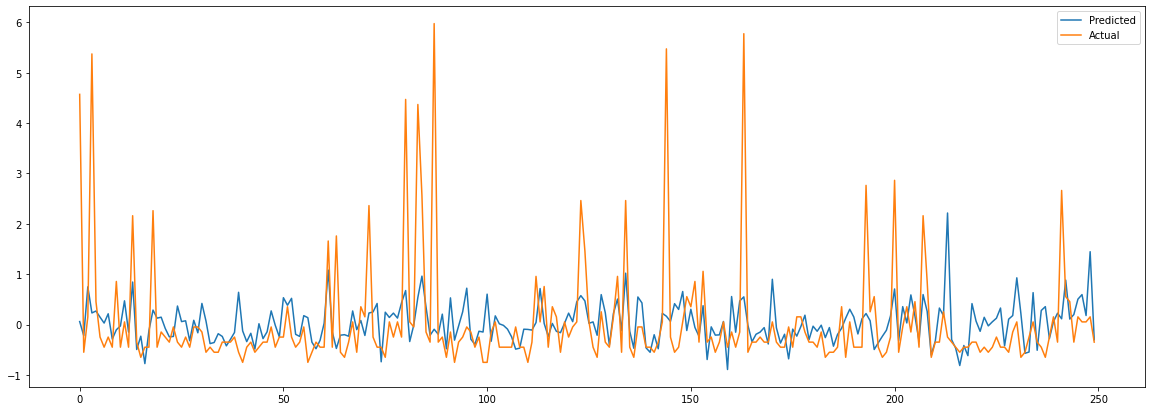

In [ ]:
plt.figure(figsize = (20,7))
plt.plot((test_y_pred[:250]))
plt.plot(np.array(y_test[:250]))
plt.legend(['Predicted','Actual'])
plt.show()


## **Implementing Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001 , max_iter = 3000)
lasso_reg.fit(x_train,y_train)


Lasso(alpha=0.001, max_iter=3000)

In [ ]:
lasso_reg.score(x_train,y_train)

0.1531116323687396

In [ ]:
lasso_reg.coef_

array([ 0.04155212,  0.57385838, -0.35662143, -0.55989766,  0.40612216,
        0.1712373 ,  0.03584335,  0.08659763, -0.16361433, -0.05475004,
        0.03474808, -0.13614718, -0.01283408,  0.13813265, -0.26367793,
       -0.03887474, -0.        , -0.        ,  0.        ,  0.06105159,
        0.00841313, -0.00729639,  0.08214924,  0.00850586])

In [ ]:
lasso_reg.intercept_

array([8.40462075e-16])

In [ ]:
train_y_lpred = lasso_reg.predict(x_train)
train_y_lpred

array([-0.22102442, -0.10115746, -0.32686828, ...,  0.80604648,
        0.78870664,  0.11608478])

In [ ]:
test_y_lpred = lasso_reg.predict(x_test)
test_y_lpred

array([ 0.05209422, -0.21092392,  0.74653903, ...,  0.14461139,
        0.45142143,  0.28967789])

In [ ]:

#Checking metrices for lasso model using testing dataset

MSE = mean_squared_error((y_test),(test_y_lpred))
print("MSE : ",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

r2 = r2_score((y_test),(test_y_lpred))
print("r2 score : ",r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test),(test_y_lpred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE :  0.8579519838387919
RMSE : 0.9262569750554065
r2 score :  0.1420480161612081
Adjusted R2 :  0.13444711264990095


### Cross-Validation and Hyperparameter Tuning for Lasso

In [ ]:
#cross-validation using GridSerachCV

from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0002,0.0003,0.0005,0.0008,0.0010,0.0015]}
lasso_regressor = GridSearchCV(lasso,parameters, scoring = 'neg_mean_squared_error',cv = 5)
lasso_regressor.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0002, 0.0003, 0.0005,
                                   0.0008, 0.001, 0.0015]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0005}

Using  {'alpha': 0.0005}  the negative mean squared error is:  -0.8512873168078213


In [ ]:
y_test_pred_lasso = lasso_regressor.predict(x_test)
y_train_pred_lasso = lasso_regressor.predict(x_train)

In [ ]:
y_test_pred_lasso

array([ 0.05300667, -0.21205189,  0.74908117, ...,  0.14249854,
        0.43773326,  0.29011879])

In [ ]:
y_train_pred_lasso

array([-0.22646645, -0.11354221, -0.32284989, ...,  0.82109213,
        0.79694895,  0.11932434])

In [ ]:
#Checking metrices for lasso model using training dataset

MSE = mean_squared_error((y_train),(y_train_pred_lasso))
print("MSE : ",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

r2 = r2_score((y_train),(y_train_pred_lasso))
print("r2 score : ",r2)

print("Adjusted R2 : ",1-(1-r2_score((y_train),(y_train_pred_lasso)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))

MSE :  0.8466989917408014
RMSE : 0.9201624811634093
r2 score :  0.15330100825919857
Adjusted R2 :  0.15143859639944435


In [ ]:
#Checking metrices for lasso model using testing dataset

MSE = mean_squared_error((y_test),(y_test_pred_lasso))
print("MSE : ",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

r2 = r2_score((y_test),(y_test_pred_lasso))
print("r2 score : ",r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_test_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE :  0.8585828740322365
RMSE : 0.9265974714147651
r2 score :  0.14141712596776346
Adjusted R2 :  0.13381063317456532


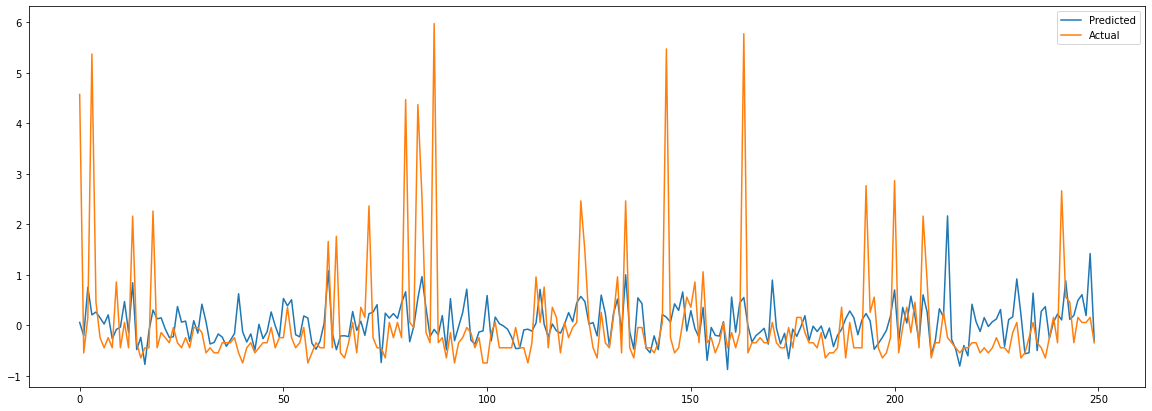

In [ ]:
plt.figure(figsize = (20,7))
plt.plot((y_test_pred_lasso[:250]))
plt.plot(np.array(y_test[:250]))
plt.legend(['Predicted','Actual'])
plt.show()

## **Implementing Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.001 , max_iter = 3000)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.001, max_iter=3000)

In [ ]:
ridge_reg.score(x_train,y_train)

0.15339988898831314

In [ ]:
ridge_reg.coef_

array([[ 6.63999710e-02,  6.06360088e-01, -4.08428827e-01,
        -6.07643996e-01,  4.14196058e-01,  1.76396285e-01,
         4.99948852e-02,  1.16117176e-01, -1.70891282e-01,
        -5.60963896e-02,  3.00243306e-02, -1.44690149e-01,
        -1.14916273e-02,  1.44806169e-01, -2.75618122e-01,
        -4.52948164e-02,  9.27335313e-02, -3.03510817e-04,
         6.06211059e-02,  6.34756278e-02,  8.82544412e-03,
        -8.77706440e-02,  7.85238446e-02,  9.55617020e-03]])

In [ ]:
ridge_reg.intercept_

array([9.57246634e-16])

In [ ]:
train_y_rpred = ridge_reg.predict(x_train)
train_y_rpred

array([[-0.23656337],
       [-0.13075374],
       [-0.3165267 ],
       ...,
       [ 0.84086609],
       [ 0.81130968],
       [ 0.12062296]])

In [ ]:
test_y_rpred = ridge_reg.predict(x_test)
test_y_rpred

array([[ 0.05909337],
       [-0.22062775],
       [ 0.7488807 ],
       ...,
       [ 0.14355699],
       [ 0.41340452],
       [ 0.2878603 ]])

In [ ]:

#Checking metrices for Ridge model using testing dataset

MSE = mean_squared_error((y_test),(test_y_rpred))
print("MSE : ",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

r2 = r2_score((y_test),(test_y_rpred))
print("r2 score : ",r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test),(test_y_rpred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE :  0.8593805813002394
RMSE : 0.9270278212115531
r2 score :  0.14061941869976058
Adjusted R2 :  0.13300585873253812


### Cross-Validation and Hyperparameter Tuning for Ridge

In [ ]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0002,0.0003,0.0005,0.0008,0.0010,0.0015]}
ridge_regressor = GridSearchCV(ridge,parameters, scoring = 'neg_mean_squared_error',cv = 5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0002, 0.0003, 0.0005,
                                   0.0008, 0.001, 0.0015]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 0.0005}  the negative mean squared error is:  -0.8515677463829577


In [ ]:
y_test_pred_ridge = ridge_regressor.predict(x_test)
y_train_pred_ridge = ridge_regressor.predict(x_train)

In [ ]:
y_test_pred_ridge

array([[ 0.05376876],
       [-0.22147734],
       [ 0.74510551],
       ...,
       [ 0.14948778],
       [ 0.42091596],
       [ 0.28851962]])

In [ ]:
y_train_pred_ridge

array([[-0.22924531],
       [-0.1106634 ],
       [-0.32086833],
       ...,
       [ 0.81284165],
       [ 0.79490019],
       [ 0.12605398]])

In [ ]:
#Checking metrices for ridge model using training dataset

MSE = mean_squared_error((y_train),(y_train_pred_ridge))
print("MSE : ",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

r2 = r2_score((y_train),(y_train_pred_ridge))
print("r2 score : ",r2)

print("Adjusted R2 : ",1-(1-r2_score((y_train),(y_train_pred_ridge)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))

MSE :  0.8467234237387592
RMSE : 0.9201757569827403
r2 score :  0.1532765762612408
Adjusted R2 :  0.1514141106604957


In [ ]:
#Checking metrices for ridge model using testing dataset

MSE = mean_squared_error((y_test),(y_test_pred_ridge))
print("MSE : ",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

r2 = r2_score((y_test),(y_test_pred_ridge))
print("r2 score : ",r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_test_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE :  0.8584212669310479
RMSE : 0.926510262723003
r2 score :  0.14157873306895208
Adjusted R2 :  0.13397367201086974


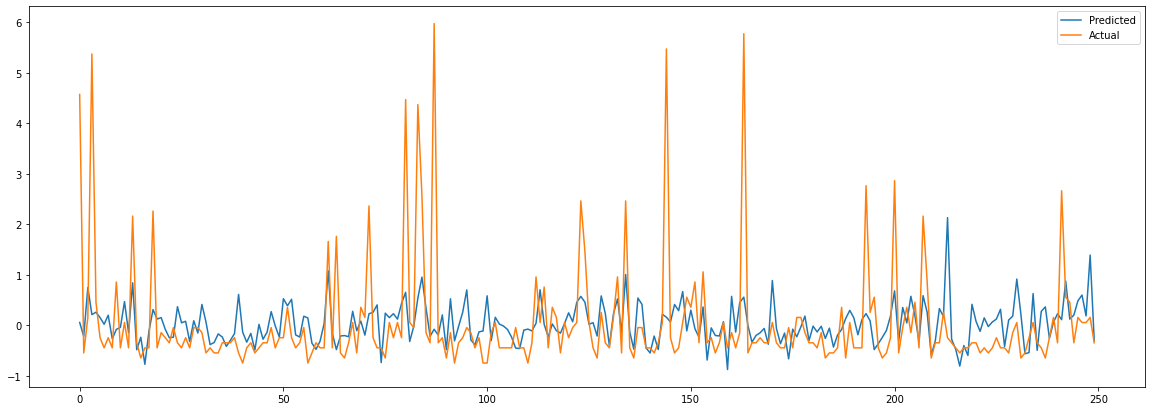

In [ ]:
plt.figure(figsize = (20,7))
plt.plot((y_test_pred_ridge[:250]))
plt.plot(np.array(y_test[:250]))
plt.legend(['Predicted','Actual'])
plt.show()

## **Implementing various models**

We are having a number of models let's just find the best model for our dataset. 

Here also we are implementing lasso and ridge again just to remain intact with the understanding purpose.

In [ ]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [ ]:
model=[
    ["Lasso : ",Lasso()],
    ["Ridge : ",Ridge()],
    ["ElasticNet : ",ElasticNet()],
    ["RandomForest : ",RandomForestRegressor()],
    ["Gradientboosting : ",GradientBoostingRegressor()],
    ["Xgboost : ",XGBRegressor()],

]
 

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

model_list = []
for name,fit_model in model:
  fit_model_list = {}
  fit_model.random_state = 100
  fit_model_list["Name"] = name
  fit_model.fit(x_train,y_train)
  fit_model_list["Train_r2_score"] = r2_score(y_train,fit_model.predict(x_train))
  fit_model_list["Test_r2_score"] = r2_score(y_test,fit_model.predict(x_test))
  fit_model_list["Train_MSE"] = mean_squared_error(y_train,fit_model.predict(x_train))
  fit_model_list["Test_MSE"] = mean_squared_error(y_test,fit_model.predict(x_test))
  fit_model_list["Train_RMSE"] = np.sqrt(mean_squared_error(y_train,fit_model.predict(x_train)))
  fit_model_list["Test_RMSE"] = np.sqrt(mean_squared_error(y_test,fit_model.predict(x_test)))
  model_list.append(fit_model_list)


[06:34:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model_list

[{'Name': 'Lasso : ',
  'Train_r2_score': 0.0,
  'Test_r2_score': 0.0,
  'Train_MSE': 1.0,
  'Test_MSE': 1.0,
  'Train_RMSE': 1.0,
  'Test_RMSE': 1.0},
 {'Name': 'Ridge : ',
  'Train_r2_score': 0.15339948943852022,
  'Test_r2_score': 0.14067821716502105,
  'Train_MSE': 0.8466005105614798,
  'Test_MSE': 0.859321782834979,
  'Train_RMSE': 0.9201089666781211,
  'Test_RMSE': 0.9269961072383093},
 {'Name': 'ElasticNet : ',
  'Train_r2_score': 0.0,
  'Test_r2_score': 0.0,
  'Train_MSE': 1.0,
  'Test_MSE': 1.0,
  'Train_RMSE': 1.0,
  'Test_RMSE': 1.0},
 {'Name': 'RandomForest : ',
  'Train_r2_score': 0.9381408150963255,
  'Test_r2_score': 0.569606079519559,
  'Train_MSE': 0.061859184903674445,
  'Test_MSE': 0.430393920480441,
  'Train_RMSE': 0.2487150677053452,
  'Test_RMSE': 0.6560441452222868},
 {'Name': 'Gradientboosting : ',
  'Train_r2_score': 0.3777320651877383,
  'Test_r2_score': 0.2849104804122168,
  'Train_MSE': 0.6222679348122617,
  'Test_MSE': 0.7150895195877832,
  'Train_RMSE': 0.

In [ ]:
model_list_df = pd.DataFrame(model_list)
model_list_df

,Name,Train_r2_score,Test_r2_score,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE
0,Lasso :,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1,Ridge :,0.153399,0.140678,0.846601,0.859322,0.920109,0.926996
2,ElasticNet :,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
3,RandomForest :,0.938141,0.569606,0.061859,0.430394,0.248715,0.656044
4,Gradientboosting :,0.377732,0.284910,0.622268,0.715090,0.788840,0.845630
5,Xgboost :,0.370691,0.283070,0.629309,0.716930,0.793290,0.846717


In [ ]:
model_df = model_list_df.sort_values(by="Train_r2_score",ascending=False)
model_df

,Name,Train_r2_score,Test_r2_score,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE
3,RandomForest :,0.938141,0.569606,0.061859,0.430394,0.248715,0.656044
4,Gradientboosting :,0.377732,0.284910,0.622268,0.715090,0.788840,0.845630
5,Xgboost :,0.370691,0.283070,0.629309,0.716930,0.793290,0.846717
1,Ridge :,0.153399,0.140678,0.846601,0.859322,0.920109,0.926996
0,Lasso :,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2,ElasticNet :,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


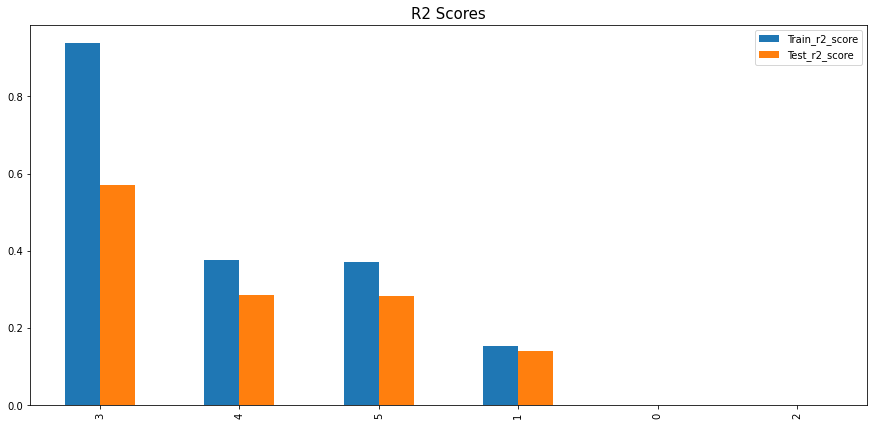

In [ ]:
model_df.plot(y = ["Train_r2_score","Test_r2_score"],kind = "bar" , figsize = (15,7))
plt.title("R2 Scores",size = 15)
plt.show()

From above we are clear that Random Forest is the best model for us therefore we we'll apply cross-validation to random forest regressor to get the best parameters.

In [ ]:
#Implementing cross validation for random forest regressor

from sklearn.model_selection import GridSearchCV
ran_for = RandomForestRegressor(random_state=40)
parameters = [{'n_estimators' :[50,100,150,200,260],
             'max_depth'  :[100,150,200],
             'max_features' :["sqrt", "log2", "auto"]
             }]
ran_for_grid_search = GridSearchCV(estimator = ran_for,param_grid = parameters,scoring = "r2",n_jobs = -1,cv = 5,verbose = 2)
ran_for_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [100, 150, 200],
                          'max_features': ['sqrt', 'log2', 'auto'],
                          'n_estimators': [50, 100, 150, 200, 260]}],
             scoring='r2', verbose=2)

In [ ]:
ran_for_grid_search.best_params_

{'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 200}

In [ ]:
ran_for_grid_search.best_estimator_

RandomForestRegressor(max_depth=100, max_features='sqrt', n_estimators=200,
                      random_state=40)

In [ ]:
y_predict_train = ran_for_grid_search.best_estimator_.score(x_train,y_train)

In [ ]:
y_predict_train

0.942475628606859

In [ ]:
y_predict_test = ran_for_grid_search.best_estimator_.score(x_test,y_test)

In [ ]:
y_predict_test

0.5956598572898287

In [ ]:
MSE_train = (mean_squared_error(y_train,ran_for_grid_search.best_estimator_.predict(x_train)))

In [ ]:
MSE_train

0.05752437139314106

In [ ]:
MSE_test = (mean_squared_error(y_test,ran_for_grid_search.best_estimator_.predict(x_test)))

In [ ]:
MSE_test

0.40434014271017127

In [ ]:
RMSE_train = np.sqrt(mean_squared_error(y_train,ran_for_grid_search.best_estimator_.predict(x_train)))

In [ ]:
RMSE_train

0.23984238864959018

In [ ]:
RMSE_test = np.sqrt(mean_squared_error(y_test,ran_for_grid_search.best_estimator_.predict(x_test)))

In [ ]:
RMSE_test

0.6358774588788089

In [ ]:
new_model_= [['Enhanced Random Forest:',0.94247,0.59565,0.05752,0.4043,0.23984,0.63587]]

In [ ]:
bst_rf = pd.DataFrame(new_model_,columns=["Name","Train_r2_score","Test_r2_score","Train_MSE","Test_MSE","Train_RMSE","Test_RMSE"])

In [ ]:
bst_rf

,Name,Train_r2_score,Test_r2_score,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE
0,Enhanced Random Forest:,0.94247,0.59565,0.05752,0.4043,0.23984,0.63587


In [ ]:
every_model = model_df.append(bst_rf).set_index("Name").sort_values(by="Train_r2_score",ascending=False)

In [ ]:
every_model

,Train_r2_score,Test_r2_score,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE
Name,,,,,,
Enhanced Random Forest:,0.942470,0.595650,0.057520,0.404300,0.239840,0.635870
RandomForest :,0.938141,0.569606,0.061859,0.430394,0.248715,0.656044
Gradientboosting :,0.377732,0.284910,0.622268,0.715090,0.788840,0.845630
Xgboost :,0.370691,0.283070,0.629309,0.716930,0.793290,0.846717
Ridge :,0.153399,0.140678,0.846601,0.859322,0.920109,0.926996
Lasso :,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
ElasticNet :,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Comparison Train and Test R2 Score')

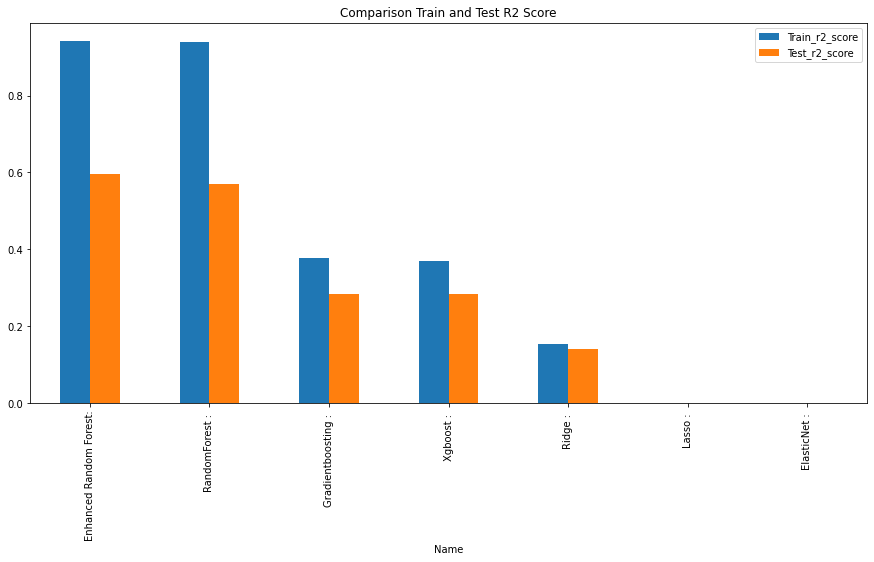

In [ ]:
every_model.plot(y=["Train_r2_score","Test_r2_score"], kind="bar", figsize=(15,7))
plt.title("Comparison Train and Test R2 Score",size = 12)

Alright We see it clearly that Random Tree Regressor provide us the best result.But, one thing which is interesting in Random Tree Regressor is that its Interpretability is difficult.Since now a days it is sometime asked To show the path happening behind the scene.

But there are some fantastic libraries like LIME,SHAP,ELI5 etc. to make thing interpretable we will make the use of ELI5 to understand our model.




### **Model Explainability using ELI5**

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 61.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=2169a3d8a6db29231628a0dd07257ad86ff1699d3ae55a145b06d68f312db56e
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [ ]:
import eli5 as eli

In [ ]:
eli.explain_weights(ran_for_grid_search.best_estimator_)

Weight,Feature
0.0908 ± 0.0702,x22
0.0497 ± 0.0274,x5
0.0494 ± 0.0254,x4
0.0467 ± 0.0260,x14
0.0461 ± 0.0233,x1
0.0460 ± 0.0234,x17
0.0444 ± 0.0245,x10
0.0437 ± 0.0215,x3
0.0429 ± 0.0254,x12
0.0414 ± 0.0241,x18


In [ ]:
eli.show_prediction(ran_for_grid_search.best_estimator_,X.iloc[1],
                    feature_names = list(X.columns),
                    show_feature_values = True)

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***